# Notebook 9: Análisis Comparativo Completo de Métricas

En este notebook cargamos los resultados de entrenamiento del Notebook 7, combinamos las métricas en un único DataFrame y realizamos un análisis comparativo del rendimiento según:

- Tipo de submuestreo (aleatorio, informado por usuarios, informado por ítems)
- Tamaño del dataset utilizado (10%, 25%, 50%, 75%)

Se analizarán las métricas de predicción (RMSE, MAE) y las métricas de ranking (Precision@K, Recall@K) junto con Coverage.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_path = "../results"
metrics_file = f"{results_path}/recommendation_metrics.csv"

metrics_df = pd.read_csv(metrics_file)
metrics_df.head()

,dataset,rmse,mae,precision_at_k,recall_at_k,coverage,diversity,novelty,emissions_kg
0,random_10,0.963246,0.764052,0.228265,0.835315,2690,0,0,0.000009
1,random_25,0.941447,0.745772,0.378964,0.839127,3107,0,0,0.000023
2,random_50,0.918194,0.724797,0.522936,0.769830,3320,0,0,0.000040
3,random_75,0.892747,0.702913,0.618779,0.694492,3403,0,0,0.000072
4,informed_users_10,0.861041,0.676441,0.854801,0.161023,3309,0,0,0.000036


# Separación de método y fracción

La columna `dataset` tiene el formato `method_fraction` (p.ej., random_10).  
Creamos dos columnas: `method` y `fraction`.

In [4]:
metrics_df["method"] = metrics_df["dataset"].apply(lambda x: "_".join(x.split("_")[:-1]))
metrics_df["fraction"] = metrics_df["dataset"].apply(lambda x: int(x.split("_")[-1]))

metrics_df.head()

,dataset,rmse,mae,precision_at_k,recall_at_k,coverage,diversity,novelty,emissions_kg,method,fraction
0,random_10,0.963246,0.764052,0.228265,0.835315,2690,0,0,0.000009,random,10
1,random_25,0.941447,0.745772,0.378964,0.839127,3107,0,0,0.000023,random,25
2,random_50,0.918194,0.724797,0.522936,0.769830,3320,0,0,0.000040,random,50
3,random_75,0.892747,0.702913,0.618779,0.694492,3403,0,0,0.000072,random,75
4,informed_users_10,0.861041,0.676441,0.854801,0.161023,3309,0,0,0.000036,informed_users,10


# Visualización de métricas de predicción (RMSE y MAE)

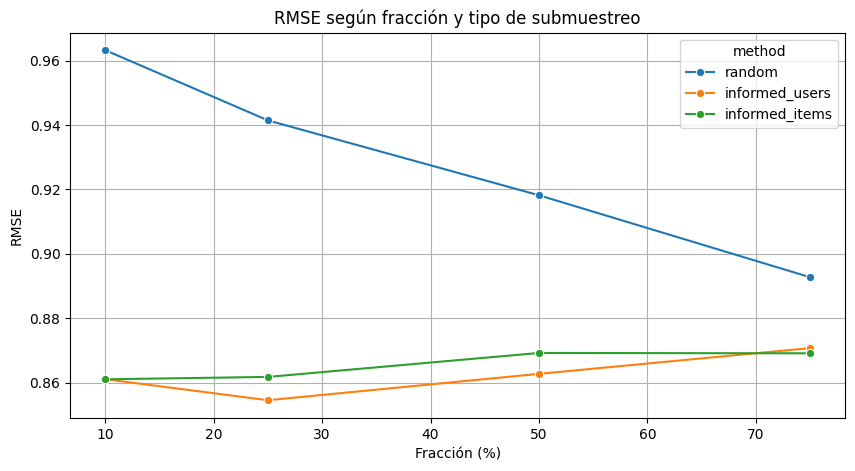

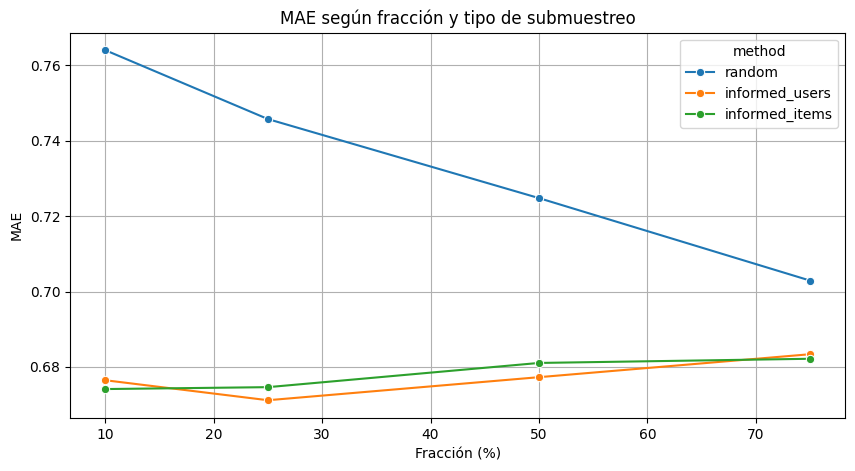

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(data=metrics_df, x="fraction", y="rmse", hue="method", marker="o")
plt.title("RMSE según fracción y tipo de submuestreo")
plt.xlabel("Fracción (%)")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=metrics_df, x="fraction", y="mae", hue="method", marker="o")
plt.title("MAE según fracción y tipo de submuestreo")
plt.xlabel("Fracción (%)")
plt.ylabel("MAE")
plt.grid(True)
plt.show()

# Visualización de métricas de ranking (Precision@K y Recall@K)

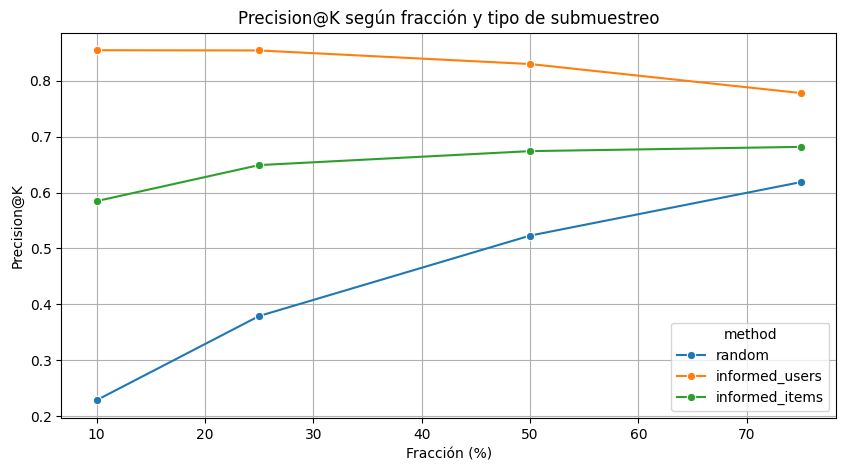

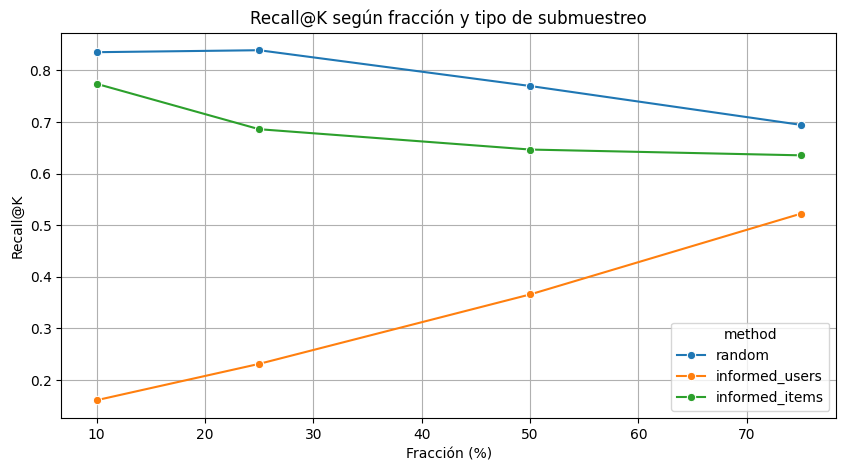

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(data=metrics_df, x="fraction", y="precision_at_k", hue="method", marker="o")
plt.title("Precision@K según fracción y tipo de submuestreo")
plt.xlabel("Fracción (%)")
plt.ylabel("Precision@K")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=metrics_df, x="fraction", y="recall_at_k", hue="method", marker="o")
plt.title("Recall@K según fracción y tipo de submuestreo")
plt.xlabel("Fracción (%)")
plt.ylabel("Recall@K")
plt.grid(True)
plt.show()

# Visualización de métricas de diversidad y novedad

Aunque se incluyen en la estructura del experimento, las métricas *Diversity* y *Novelty* no se han calculado debido a su elevado coste computacional sobre MovieLens-1M y a la multiplicación de escenarios experimentales. Por tanto, no se representan gráficamente al no aportar información (valor constante = 0)

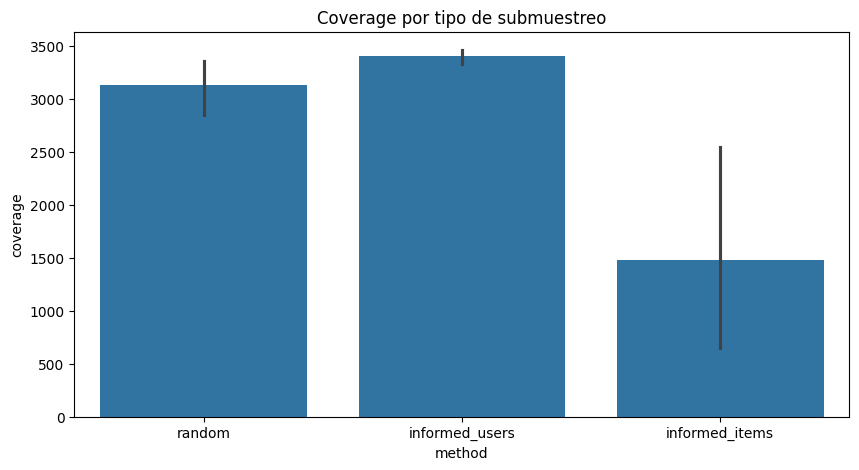

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(data=metrics_df, x="method", y="coverage")
plt.title("Coverage por tipo de submuestreo")
plt.show()

## Visualización de emisiones de CO2

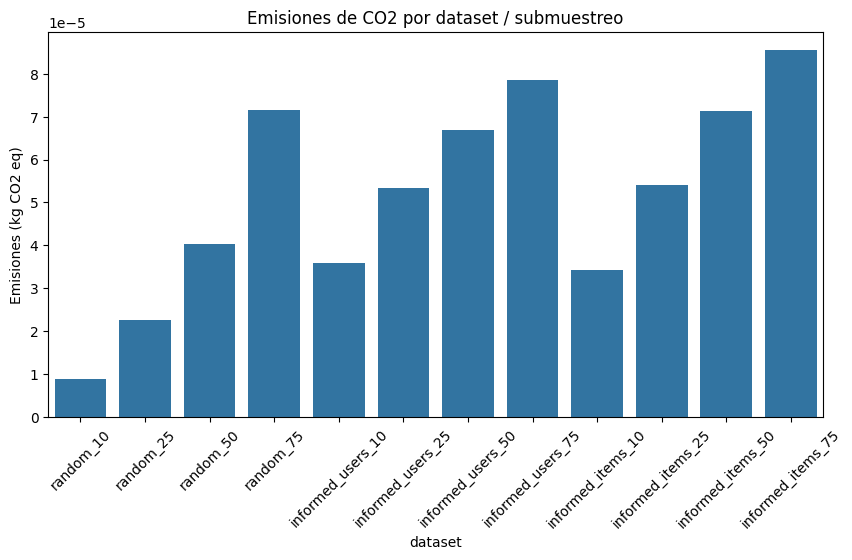

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(data=metrics_df, x="dataset", y="emissions_kg")
plt.title("Emisiones de CO2 por dataset / submuestreo")
plt.xticks(rotation=45)
plt.ylabel("Emisiones (kg CO2 eq)")
plt.show()